<a href="https://colab.research.google.com/github/mostafa11244/MLproject/blob/main/Bike_Prediction_%26EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':[10, 7]},font_scale=1.2)

In [2]:
df =pd.read_csv('/content/train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
def calculate_profit(x):
    casual_customers= x['casual']
    registerd_customers= x['registered']
    registerd_price_per_hour=5
    casual_price_per_hour=20
    taxes_percent=0.14
    maintinanas_per_hour= 1500 / (365*24)
    profit_cash= casual_customers * casual_price_per_hour +  registerd_customers *  registerd_price_per_hour
    profit_with_taxes =profit_cash- (taxes_percent * profit_cash)
    total_profit =profit_with_taxes -  maintinanas_per_hour
    return total_profit


df['Profit']=df[['casual' , 'registered']].apply(calculate_profit,axis=1)

In [4]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
Profit        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  Profit      10886 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.1+ MB


In [7]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,107.328767
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1165.128767
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,709.328767


In [8]:
df['datetime'] = pd.to_datetime(df['datetime'],format = '%Y-%m-%d %H:%M:%S',errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  Profit      10886 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 1.1 MB


In [10]:
df['year'] =df['datetime'].dt.year
df['month_name'] = df['datetime'].dt.month_name()
df['month']=df['datetime'].dt.month
df['day_of_week']= df['datetime'].dt.day_name()
df['hour'] =df['datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit,year,month_name,month,day_of_week,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,107.328767,2011,January,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4.128767,2011,January,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1165.128767,2012,December,12,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22


<Axes: xlabel='day_of_week'>

<Figure size 720x720 with 0 Axes>

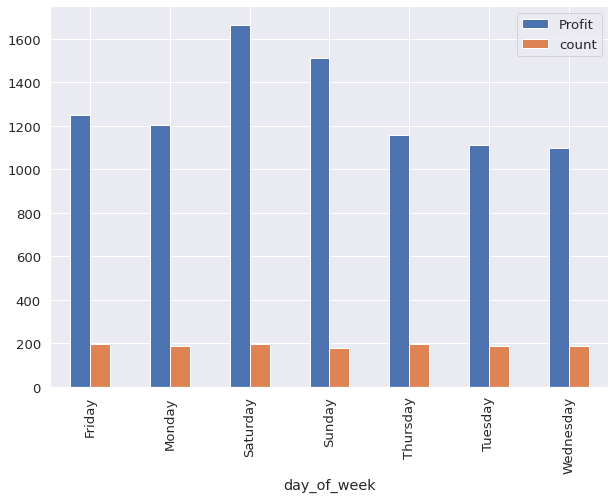

In [11]:
plt.figure(figsize=(10,10))
df.groupby('day_of_week').mean()[['Profit','count']].plot(kind='bar')

In [12]:
df.groupby('day_of_week').describe()[['count']].transpose()

day_of_week       Friday       Monday     Saturday       Sunday     Thursday  \
count count  1529.000000  1551.000000  1584.000000  1579.000000  1553.000000   
      mean    197.844343   190.390716   196.665404   180.839772   197.296201   
      std     172.518208   180.943376   180.917795   167.022145   187.606619   
      min       1.000000     1.000000     1.000000     1.000000     1.000000   
      25%      52.000000    39.000000    45.000000    43.000000    44.000000   
      50%     167.000000   146.000000   141.500000   119.000000   155.000000   
      75%     290.000000   277.500000   309.500000   298.000000   280.000000   
      max     900.000000   968.000000   783.000000   757.000000   901.000000   

day_of_week      Tuesday    Wednesday  
count count  1539.000000  1551.000000  
      mean    189.723847   188.411348  
      std     186.719673   190.942004  
      min       1.000000     1.000000  
      25%      36.000000    38.000000  
      50%     146.000000   136.000000  
      75%     274.000000   270.500000  
      max     970.000000   977.000000

In [13]:
df.groupby('season').describe()['Profit']

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,699.920316,853.820568,4.128767,128.828767,438.428767,920.028767,7679.628767
2,2733.0,1537.472894,1453.088262,4.128767,322.328767,1216.728767,2244.428767,7795.728767
3,2733.0,1681.463893,1427.630038,4.128767,442.728767,1414.528767,2463.728767,7881.728767
4,2734.0,1224.171196,1185.870080,4.128767,292.228767,937.228767,1754.228767,7864.528767


In [14]:
df.groupby('season').describe()['count'].transpose()

season,1,2,3,4
count,2686.000000,2733.000000,2733.000000,2734.000000
mean,116.343261,215.251372,234.417124,198.988296
std,125.273974,192.007843,197.151001,177.622409
min,1.000000,1.000000,1.000000,1.000000
25%,24.000000,49.000000,68.000000,51.000000
50%,78.000000,172.000000,195.000000,161.000000
75%,164.000000,321.000000,347.000000,294.000000
max,801.000000,873.000000,977.000000,948.000000


In [15]:
df.groupby('weather').describe()['count'].transpose()

weather,1,2,3,4
count,7192.000000,2834.000000,859.000000,1.0
mean,205.236791,178.955540,118.846333,164.0
std,187.959566,168.366413,138.581297,NaN
min,1.000000,1.000000,1.000000,164.0
25%,48.000000,41.000000,23.000000,164.0
50%,161.000000,134.000000,71.000000,164.0
75%,305.000000,264.000000,161.000000,164.0
max,977.000000,890.000000,891.000000,164.0


In [16]:
df.groupby('weather').describe()['Profit'].transpose()

weather,1,2,3,4
count,7192.000000,2834.000000,859.000000,1.000000
mean,1402.328892,1166.470052,735.874634,782.428767
std,1381.640444,1159.674508,925.977295,NaN
min,4.128767,4.128767,4.128767,782.428767
25%,287.928767,244.928767,124.528767,782.428767
50%,1014.628767,825.428767,399.728767,782.428767
75%,2055.228767,1745.628767,956.578767,782.428767
max,7864.528767,7881.728767,5542.528767,782.428767


In [17]:
df.corr()[['Profit','count']]

,Profit,count
season,0.144818,0.163439
holiday,0.018346,-0.005393
workingday,-0.150138,0.011594
weather,-0.143401,-0.128655
temp,0.464454,0.394454
atemp,0.459202,0.389784
humidity,-0.360095,-0.317371
windspeed,0.105697,0.101369
casual,0.902713,0.690414
registered,0.822156,0.970948


<Axes: >

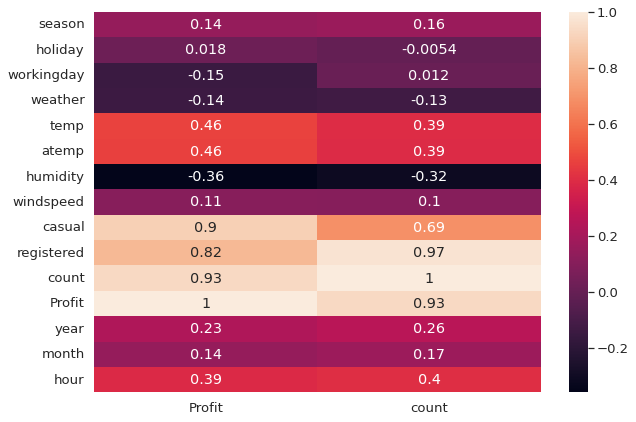

In [18]:
sns.heatmap(df.corr()[['Profit','count']],annot=True)

In [19]:
#def is_rush_hour(hour):
 #   return 1 if hour in [7,8,9,15,16,17] else 0

#df['is_rush_hour'] = df['hour'].apply(is_rush_hour)
##OR##
df['is_rush_hour'] = df['hour'].apply(lambda hour: 1 if hour in [7,8,9,15,16,17] else 0)

In [20]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit,year,month_name,month,day_of_week,hour,is_rush_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,107.328767,2011,January,1,Saturday,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4.128767,2011,January,1,Saturday,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1165.128767,2012,December,12,Wednesday,20,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22,0


In [21]:
df.groupby('is_rush_hour').describe()['Profit'].transpose()

is_rush_hour,0,1
count,8153.000000,2733.000000
mean,1069.674358,1940.420498
std,1217.987206,1356.260623
min,4.128767,4.128767
25%,158.928767,937.228767
50%,644.828767,1689.728767
75%,1547.828767,2622.828767
max,7864.528767,7881.728767


<Axes: >

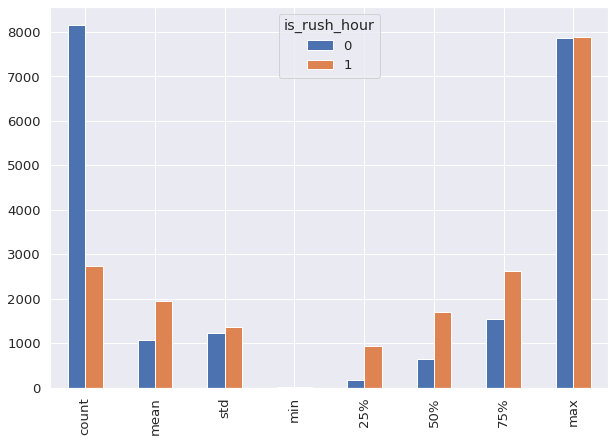

In [22]:
df.groupby('is_rush_hour').describe()['Profit'].transpose().plot(kind='bar')

In [23]:
df.groupby('is_rush_hour').describe()['count'].transpose()

is_rush_hour,0,1
count,8153.000000,2733.000000
mean,153.140562,306.227955
std,158.808647,194.740685
min,1.000000,1.000000
25%,26.000000,157.000000
50%,108.000000,276.000000
75%,225.000000,420.000000
max,977.000000,970.000000


<Axes: >

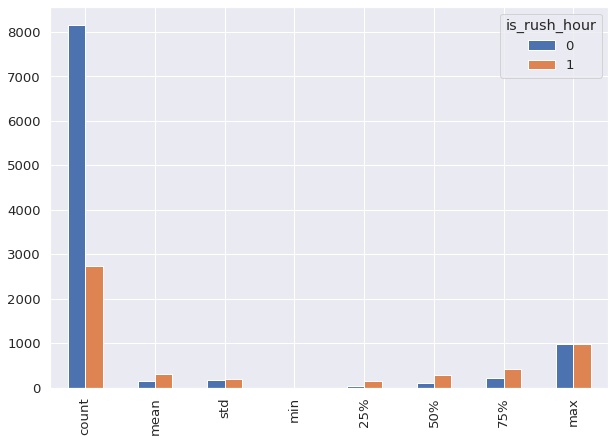

In [24]:
df.groupby('is_rush_hour').describe()['count'].transpose().plot(kind='bar')

In [25]:
df['month_name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [26]:
df['is_school_day'] = df['month_name'].apply(lambda month_name: 1 if month_name in 
['June','August', 'September', 'October', 'November', 'December','February', 'March', 'April', 'May'] else 0 )

#OR 
#def is_school_day(month_name):
#    return 1 if month_name in ['June','August', 'September', 'October', 'November', 'December','February', 'March', 'April', 'May'] else 0
#df['is_school_day'] = df['month_name'].apply(is_school_day)

In [27]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit,year,month_name,month,day_of_week,hour,is_rush_hour,is_school_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,107.328767,2011,January,1,Saturday,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4.128767,2011,January,1,Saturday,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19,0,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1165.128767,2012,December,12,Wednesday,20,0,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21,0,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22,0,1


In [28]:
df.groupby('is_school_day').describe()['count']

,count,mean,std,min,25%,50%,75%,max
is_school_day,,,,,,,,
0,1796.0,163.976058,164.517405,1.0,34.0,111.0,244.0,872.0
1,9090.0,197.026953,183.770871,1.0,45.0,152.0,290.0,977.0


In [29]:
df.groupby('is_school_day').describe()['Profit']

,count,mean,std,min,25%,50%,75%,max
is_school_day,,,,,,,,
0,1796.0,1122.947587,1205.986153,4.128767,196.553767,644.828767,1762.828767,6187.528767
1,9090.0,1320.947238,1326.842066,4.128767,270.728767,945.828767,1926.228767,7881.728767


**Profit in 2011 & saterday & All season**

**#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter** 


In [30]:
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
df[ (df['year'] == 2011) & (df['day_of_week'] == 'Saturday') & (df['season'] == 1)][['Profit' , 'count']].sum()

Profit    118716.113699
count      14630.000000
dtype: float64

In [31]:
df[ (df['year'] == 2011) & (df['day_of_week'] == 'Saturday') & (df['season'] == 2)][['Profit' , 'count']].sum()

Profit    251530.023288
count      29052.000000
dtype: float64

In [32]:
df[ (df['year'] == 2011) & (df['day_of_week'] == 'Saturday') & (df['season'] == 3)][['Profit' , 'count']].sum()

Profit    358690.323288
count      39162.000000
dtype: float64

In [33]:
df[ (df['year'] == 2011) & (df['day_of_week'] == 'Saturday') & (df['season'] == 4)][['Profit' , 'count']].sum()

Profit    269431.113699
count      34254.000000
dtype: float64

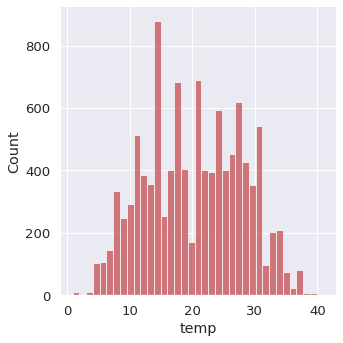

In [34]:
sns.displot(df['temp'],color='r')

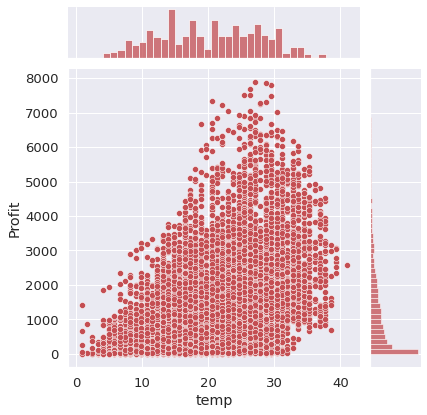

In [35]:
sns.jointplot(data=df,x= 'temp',y='Profit',color='r')

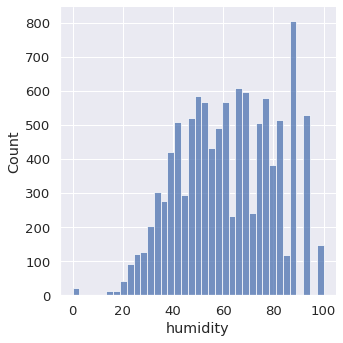

In [36]:
sns.displot(df['humidity'],color='b')

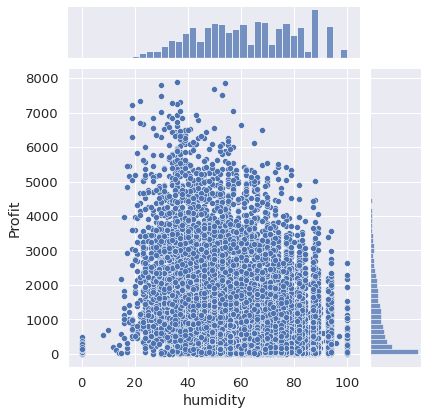

In [37]:
sns.jointplot(data=df,x= 'humidity',y='Profit',color='b')

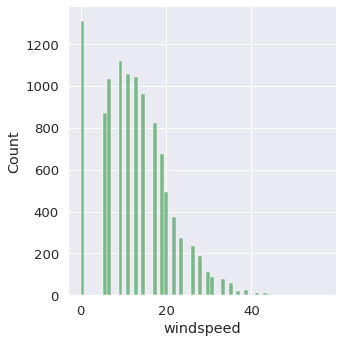

In [38]:
sns.displot(df['windspeed'],color='g')

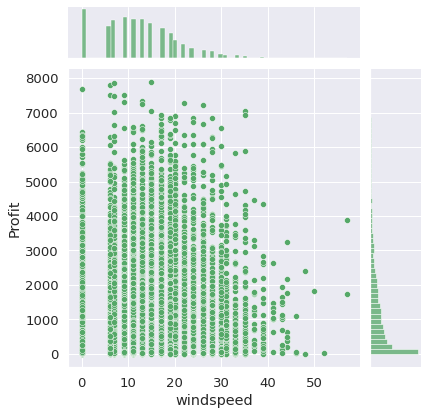

In [39]:
sns.jointplot(data=df,x= 'windspeed',y='Profit',color='g')

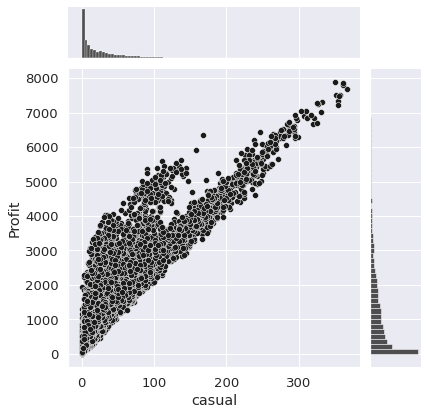

In [40]:
sns.jointplot(data=df,x= 'casual',y='Profit',color='k')

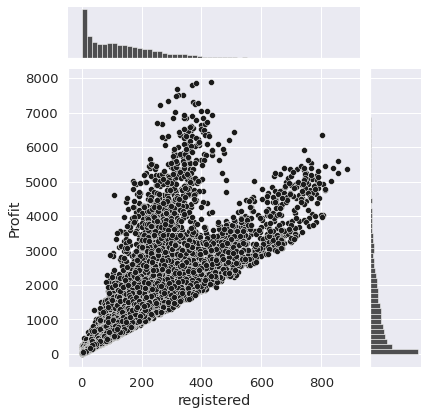

In [41]:
sns.jointplot(data=df,x= 'registered',y='Profit',color='k')

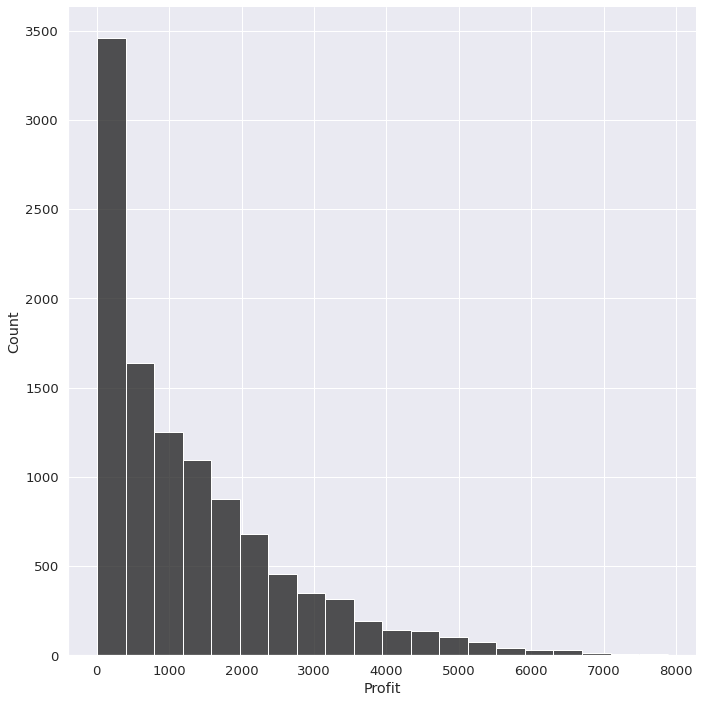

In [42]:
sns.displot(df['Profit'],color='k',height=10 ,bins=20)

<Axes: xlabel='season', ylabel='count'>

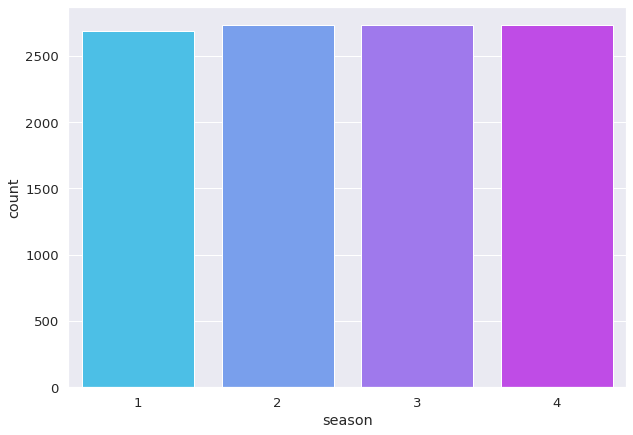

In [43]:
sns.countplot(x='season',data=df,palette='cool')

<Axes: xlabel='holiday', ylabel='count'>

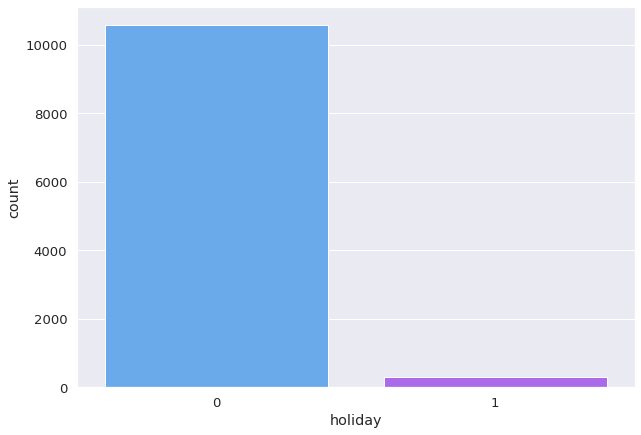

In [44]:
sns.countplot(x='holiday',data=df,palette='cool')

<Axes: xlabel='workingday', ylabel='count'>

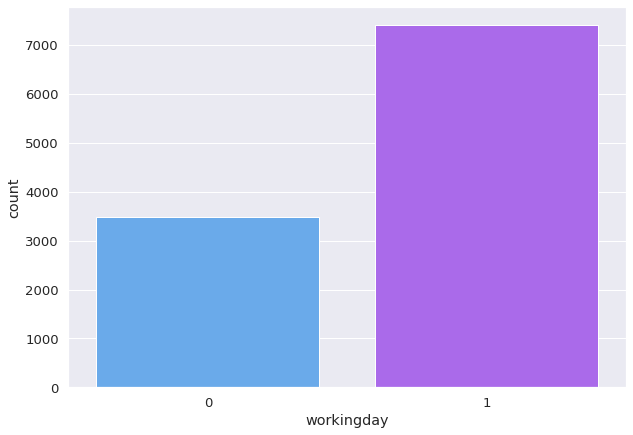

In [45]:
sns.countplot(x='workingday',data=df,palette='cool')

<Axes: xlabel='year', ylabel='count'>

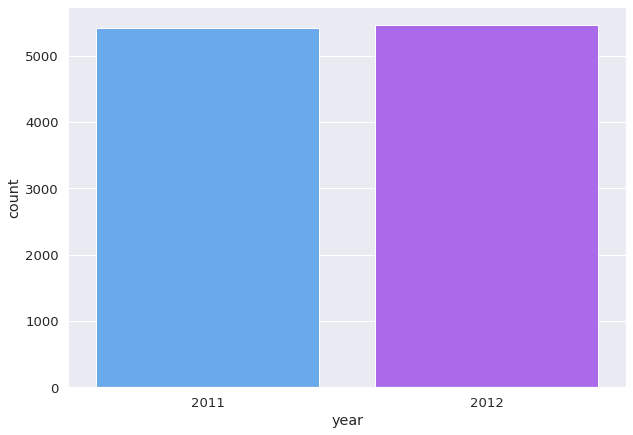

In [46]:
sns.countplot(x='year',data=df,palette='cool')

<Axes: xlabel='is_rush_hour', ylabel='count'>

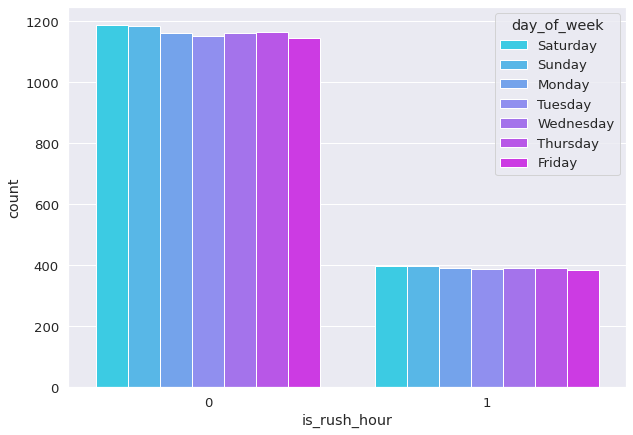

In [47]:
sns.countplot(x='is_rush_hour',data=df,palette='cool',hue='day_of_week')

<Axes: xlabel='is_school_day', ylabel='count'>

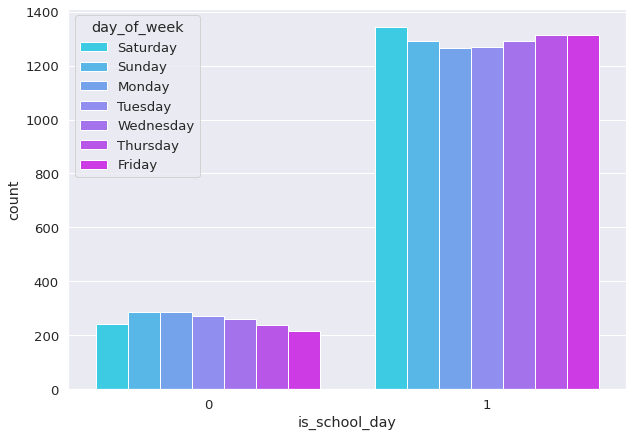

In [48]:
sns.countplot(x='is_school_day',data=df,palette='cool',hue='day_of_week')

<Axes: xlabel='hour', ylabel='Profit'>

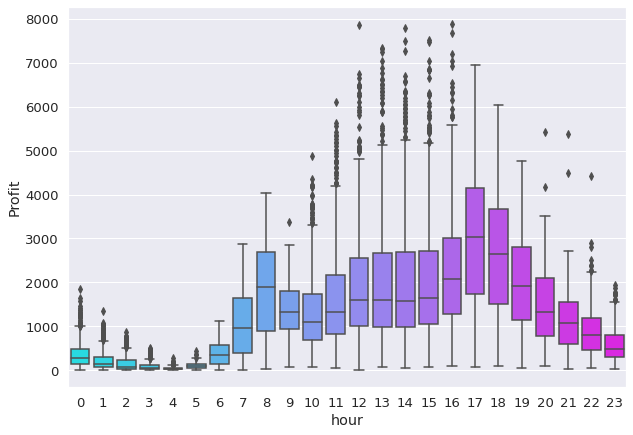

In [49]:
sns.boxplot(x= 'hour' ,y='Profit',data=df,palette='cool')

<Axes: xlabel='is_rush_hour', ylabel='Profit'>

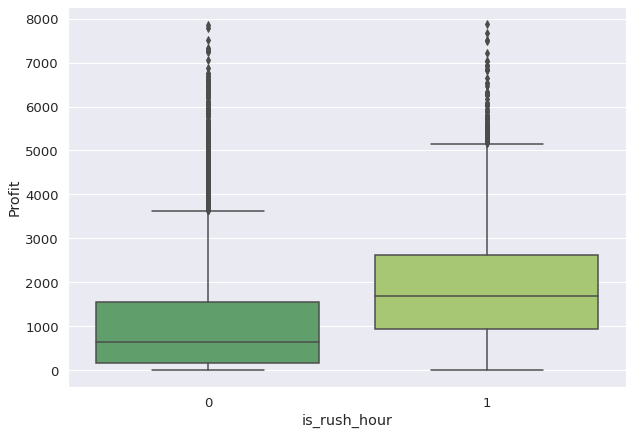

In [50]:
sns.boxplot(x= 'is_rush_hour' ,y='Profit',data=df,palette='summer')

In [51]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit,year,month,hour,is_rush_hour,is_school_day
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,1288.280751,2011.501929,6.521495,11.541613,0.251056,0.835017
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,1309.683400,0.500019,3.444373,6.915838,0.433641,0.371182
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,4.128767,2011.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,253.528767,2011.000000,4.000000,6.000000,0.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,889.928767,2012.000000,7.000000,12.000000,0.000000,1.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,1891.828767,2012.000000,10.000000,18.000000,1.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,7881.728767,2012.000000,12.000000,23.000000,1.000000,1.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       10886 non-null  datetime64[ns]
 1   season         10886 non-null  int64         
 2   holiday        10886 non-null  int64         
 3   workingday     10886 non-null  int64         
 4   weather        10886 non-null  int64         
 5   temp           10886 non-null  float64       
 6   atemp          10886 non-null  float64       
 7   humidity       10886 non-null  int64         
 8   windspeed      10886 non-null  float64       
 9   casual         10886 non-null  int64         
 10  registered     10886 non-null  int64         
 11  count          10886 non-null  int64         
 12  Profit         10886 non-null  float64       
 13  year           10886 non-null  int64         
 14  month_name     10886 non-null  object        
 15  month          1088

In [53]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'Profit', 'year', 'month_name', 'month', 'day_of_week', 'hour',
       'is_rush_hour', 'is_school_day'],
      dtype='object')

In [54]:
for col in df.columns:
    print(col + '\n------')
    print(df[col].value_counts())
    print('=========================================================')

datetime
------
2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64
season
------
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
holiday
------
0    10575
1      311
Name: holiday, dtype: int64
workingday
------
1    7412
0    3474
Name: workingday, dtype: int64
weather
------
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
temp
------
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.8

In [55]:
df = df[['season', 'holiday', 'workingday', 'weather', 'temp','humidity','count', 'Profit' , 'month','day_of_week', 'hour' ]]

In [56]:
df= pd.get_dummies(df,columns=['day_of_week'],drop_first=True)

In [58]:
df

,season,holiday,workingday,weather,temp,humidity,count,Profit,month,hour,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1,0,0,1,9.84,81,16,107.328767,1,0,0,1,0,0,0,0
1,1,0,0,1,9.02,80,40,275.028767,1,1,0,1,0,0,0,0
2,1,0,0,1,9.02,80,32,201.928767,1,2,0,1,0,0,0,0
3,1,0,0,1,9.84,75,13,94.428767,1,3,0,1,0,0,0,0
4,1,0,0,1,9.84,75,1,4.128767,1,4,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,336,1534.928767,12,19,0,0,0,0,0,1
10882,4,0,1,1,14.76,57,241,1165.128767,12,20,0,0,0,0,0,1
10883,4,0,1,1,13.94,61,168,773.828767,12,21,0,0,0,0,0,1
10884,4,0,1,1,13.94,61,129,709.328767,12,22,0,0,0,0,0,1


In [60]:
x=df.drop('Profit',axis=1)
y= df['Profit']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [63]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((2178, 15), (8708, 15), (2178,), (8708,))

In [65]:
df.describe()

,season,holiday,workingday,weather,temp,humidity,count,Profit,month,hour,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,61.886460,191.574132,1288.280751,6.521495,11.541613,0.142477,0.145508,0.145049,0.142660,0.141374,0.142477
std,1.116174,0.166599,0.466159,0.633839,7.79159,19.245033,181.144454,1309.683400,3.444373,6.915838,0.349554,0.352628,0.352166,0.349742,0.348423,0.349554
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.000000,1.000000,4.128767,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,47.000000,42.000000,253.528767,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,62.000000,145.000000,889.928767,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,77.000000,284.000000,1891.828767,10.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,100.000000,977.000000,7881.728767,12.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [69]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [70]:
x_train

array([[ 0.44373858, -0.17156953,  0.68101059, ..., -0.41073372,
        -0.40939621,  2.46104167],
       [-0.45342315, -0.17156953, -1.46840595, ..., -0.41073372,
        -0.40939621, -0.40633201],
       [-0.45342315, -0.17156953,  0.68101059, ...,  2.43466741,
        -0.40939621, -0.40633201],
       ...,
       [-0.45342315, -0.17156953,  0.68101059, ..., -0.41073372,
        -0.40939621,  2.46104167],
       [-0.45342315, -0.17156953,  0.68101059, ..., -0.41073372,
        -0.40939621, -0.40633201],
       [ 0.44373858, -0.17156953,  0.68101059, ..., -0.41073372,
         2.44262154, -0.40633201]])

In [71]:
x_test

array([[ 1.34090032, -0.17156953,  0.68101059, ..., -0.41073372,
        -0.40939621, -0.40633201],
       [-1.35058488, -0.17156953, -1.46840595, ..., -0.41073372,
        -0.40939621, -0.40633201],
       [ 0.44373858, -0.17156953,  0.68101059, ..., -0.41073372,
        -0.40939621,  2.46104167],
       ...,
       [-0.45342315, -0.17156953, -1.46840595, ..., -0.41073372,
        -0.40939621, -0.40633201],
       [ 0.44373858, -0.17156953,  0.68101059, ..., -0.41073372,
        -0.40939621, -0.40633201],
       [ 1.34090032, -0.17156953, -1.46840595, ..., -0.41073372,
        -0.40939621, -0.40633201]])

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [73]:
models={
    'LR':LinearRegression(),
    'KNNR':KNeighborsRegressor(),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor()
}

In [74]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training score :{model.score(x_train,y_train)}')
    print(f'Test Score :{model.score(x_test,y_test)}')
    y_pred= model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print('======================================================')

Using model: LR
Training score :0.9180230884099152
Test Score :0.9186329065554274
RMSE: 362.451186975147
Using model: KNNR
Training score :0.9728628089737628
Test Score :0.9569326894479975
RMSE: 263.69324279070986
Using model: SVR
Training score :0.20802507380758994
Test Score :0.221460831972339
RMSE: 1121.1542262511296
Using model: DT
Training score :0.9999989236935681
Test Score :0.9648245669398521
RMSE: 238.31141838022543
Using model: RF
Training score :0.9976557778218675
Test Score :0.9849927576970561
RMSE: 155.65947893633273
Using model: XGBR
Training score :0.9971156104251974
Test Score :0.9878896546430985
RMSE: 139.83097606957674


In [76]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [77]:
y_pred = model.predict(x_test)
y_pred

array([ 214.07545 ,   12.433992, 2477.9692  , ...,  361.15674 ,
       3741.7979  , 1158.8419  ], dtype=float32)

In [78]:
np.sqrt(mean_squared_error(y_test,y_pred))

139.83097606957674

In [79]:
import joblib

In [80]:
joblib.dump(model, 'model.h5')

['model.h5']

In [81]:
joblib.dump(model, 'scaler.h5')

['scaler.h5']